In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Processing

In [119]:
data = pd.read_csv("https://raw.githubusercontent.com/mayaasprouse/142_Project/main/Spotify_data.csv")
data.head(1)

,Unnamed: 0,artist_name,track_name,track_id,popularity,release_date,artist_followers,Position,Track Name,Artist,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,Migos,Bad and Boujee (feat. Lil Uzi Vert),4Km5HrUvYTaSUfiSGPJeQR,74,2017-01-27,11884750,1,Bad and Boujee (feat. Lil Uzi Vert),Migos,...,0.123,0.175,127.076,audio_features,4Km5HrUvYTaSUfiSGPJeQR,spotify:track:4Km5HrUvYTaSUfiSGPJeQR,https://api.spotify.com/v1/tracks/4Km5HrUvYTaS...,https://api.spotify.com/v1/audio-analysis/4Km5...,343150.0,4.0


In [120]:
#might also want to drop artist followers as number of followers only 
# extracted at day of data pull, not at date of position record`b
data = data.drop(["Unnamed: 0",
           "track_id", 
           "popularity", 
           "artist_name", 
           "track_name", 
           "Track Name", 
           "Artist", 
           "Streams", 
           "URL", 
           "type", 
           "id", 
           "uri", 
           "track_href", 
           "analysis_url"], axis=1)
data.head()

,release_date,artist_followers,Position,Month,Year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,2017-01-27,11884750,1,Jan,2017,0.927,0.665,11.0,-5.313,1.0,0.244,0.061,0.0,0.123,0.175,127.076,343150.0,4.0
1,2017-01-27,11884750,1,Feb,2017,0.927,0.665,11.0,-5.313,1.0,0.244,0.061,0.0,0.123,0.175,127.076,343150.0,4.0
2,2017-01-27,11884750,4,March,2017,0.927,0.665,11.0,-5.313,1.0,0.244,0.061,0.0,0.123,0.175,127.076,343150.0,4.0
3,2017-01-27,11884750,16,April,2017,0.927,0.665,11.0,-5.313,1.0,0.244,0.061,0.0,0.123,0.175,127.076,343150.0,4.0
4,2017-01-27,11884750,34,May,2017,0.927,0.665,11.0,-5.313,1.0,0.244,0.061,0.0,0.123,0.175,127.076,343150.0,4.0


## Time Series Extraction

In [121]:
#make years since release a variable
data['release_month'] = pd.to_datetime(data["release_date"]).dt.month
data['release_year'] = pd.to_datetime(data["release_date"]).dt.year
data["years_since_release"] = 2021 - data["release_year"]
data.head()

,release_date,artist_followers,Position,Month,Year,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,release_month,release_year,years_since_release
0,2017-01-27,11884750,1,Jan,2017,0.927,0.665,11.0,-5.313,1.0,...,0.061,0.0,0.123,0.175,127.076,343150.0,4.0,1,2017,4
1,2017-01-27,11884750,1,Feb,2017,0.927,0.665,11.0,-5.313,1.0,...,0.061,0.0,0.123,0.175,127.076,343150.0,4.0,1,2017,4
2,2017-01-27,11884750,4,March,2017,0.927,0.665,11.0,-5.313,1.0,...,0.061,0.0,0.123,0.175,127.076,343150.0,4.0,1,2017,4
3,2017-01-27,11884750,16,April,2017,0.927,0.665,11.0,-5.313,1.0,...,0.061,0.0,0.123,0.175,127.076,343150.0,4.0,1,2017,4
4,2017-01-27,11884750,34,May,2017,0.927,0.665,11.0,-5.313,1.0,...,0.061,0.0,0.123,0.175,127.076,343150.0,4.0,1,2017,4


In [122]:
#Turn release month and release year back to string
data["release_month"] = data["release_month"].apply(str)
data["release_year"] = data["release_year"].apply(str)

In [123]:
#convert the month of release into a date time object
import datetime
data["Month"] = data["Month"].str.replace("March", "Mar")
data["Month"] = data["Month"].str.replace("April", "Apr")
data["Month"] = data["Month"].str.replace("June", "Jun")
data["Month"] = data["Month"].str.replace("July", "Jul")
data["Month"].unique()
data["Month_num"] = data["Month"].apply(lambda x: datetime.datetime.strptime(x, "%b")).dt.month
data.head()

,release_date,artist_followers,Position,Month,Year,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,release_month,release_year,years_since_release,Month_num
0,2017-01-27,11884750,1,Jan,2017,0.927,0.665,11.0,-5.313,1.0,...,0.0,0.123,0.175,127.076,343150.0,4.0,1,2017,4,1
1,2017-01-27,11884750,1,Feb,2017,0.927,0.665,11.0,-5.313,1.0,...,0.0,0.123,0.175,127.076,343150.0,4.0,1,2017,4,2
2,2017-01-27,11884750,4,Mar,2017,0.927,0.665,11.0,-5.313,1.0,...,0.0,0.123,0.175,127.076,343150.0,4.0,1,2017,4,3
3,2017-01-27,11884750,16,Apr,2017,0.927,0.665,11.0,-5.313,1.0,...,0.0,0.123,0.175,127.076,343150.0,4.0,1,2017,4,4
4,2017-01-27,11884750,34,May,2017,0.927,0.665,11.0,-5.313,1.0,...,0.0,0.123,0.175,127.076,343150.0,4.0,1,2017,4,5


In [374]:
#sort values by date of observation to separate test and training sets
sorted_data = data.sort_values(["Year", "Month_num"], ascending=False)
sorted_data = sorted_data.drop("Month_num", axis=1)

In [375]:
#look for null values 
sorted_data.isna().any()

release_date           False
artist_followers       False
Position               False
Month                  False
Year                   False
danceability            True
energy                  True
key                     True
loudness                True
mode                    True
speechiness             True
acousticness            True
instrumentalness        True
liveness                True
valence                 True
tempo                   True
duration_ms             True
time_signature          True
release_month          False
release_year           False
years_since_release    False
dtype: bool

In [376]:
#look at what the null values are
sorted_data[sorted_data['energy'].isna()]

,release_date,artist_followers,Position,Month,Year,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,release_month,release_year,years_since_release
4262,2021-11-10,35134140,195,May,2019,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,2021,0
4261,2021-11-10,35134140,181,Apr,2019,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,2021,0
4260,2021-11-10,35134140,150,Jun,2018,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,2021,0
4259,2021-11-10,35134140,46,Apr,2018,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,2021,0


In [377]:
#all null values seem to be the same song, and only 4 rows - just remove
sorted_data = sorted_data.drop(sorted_data[sorted_data['energy'].isna()].index)

In [378]:
sorted_data.isna().any()

release_date           False
artist_followers       False
Position               False
Month                  False
Year                   False
danceability           False
energy                 False
key                    False
loudness               False
mode                   False
speechiness            False
acousticness           False
instrumentalness       False
liveness               False
valence                False
tempo                  False
duration_ms            False
time_signature         False
release_month          False
release_year           False
years_since_release    False
dtype: bool

In [129]:
#reset index
sorted_data = sorted_data.reset_index().drop("index", axis=1)

In [130]:
#test-train split
#sort the data by release_date, and then keep 20% most recent aside to be test set
test = sorted_data[0:2252]
train = sorted_data[2252:]
test = test.drop(["release_date", "release_year"], axis=1)
train = train.drop(["release_date", "release_year"], axis=1)

### Identify Response Variable and Process Categorical Variables

In [131]:
def encode(df, response_var):
    """Dummy encodes categorical variables and separates 
    data frame into features and response for use in sklearn"""
    encoded = pd.get_dummies(df, drop_first=True)
    columns = encoded.drop(response_var, axis=1)
    response = encoded[response_var]
    return columns, response

In [132]:
#first, dummy encode categorical variables
train_columns, train_pos = encode(train, "Position")
test_columns, test_pos = encode(test, "Position")

# Models

## Metrics

In [133]:
#metrics to be used
from sklearn.metrics import confusion_matrix
def fpr(y_true, y_pred):
    tn, fp, _, _ = confusion_matrix(y_true, y_pred).ravel()
    return fp / (fp + tn)

def acc_calc(y_true, y_pred):
    return sum(y_pred == y_true) / len(y_true)

def tpr(y_true, y_pred):
    _, _, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fn)

In [185]:
def compute_metrics(y_true,y_pred, model_name):
    """Computes the accuracy, true positive rate, and false positive rate for a given model
    y_true: a numpy array with the true y-values
    y_pred: a numpy array with te false y-values
    model_name: a string with the name of the model (just used for printing results)
    returns values in the order acc, tpr, fpr
    """
    acc1 = acc_calc(y_true, y_pred)
    tpr2 = tpr(y_true,y_pred)
    fpr2 = fpr(y_true,y_pred)
    
    print(f"The accuracy of the {model_name} model is {acc1}")
    print(f"The true positive rate of the {model_name} model is {tpr2}")
    print(f"The false positive rate of the {model_name} model is {fpr2}")
    return acc1, tpr2, fpr2

In [135]:
def reclassifyPosition(result):
    """We will reclassify a song based on its current position in dataset.
    Songs within the top 50 position will be reclassified as 50
    Songs with the 50-100 position will be recclassfied as 100
    Songs withi the 100-200 position will be reclassified as 200"""
    if result<=50:
        return "50"
    elif result<=100:
        return "100"
    return "200"

In [136]:
train_reclass = train_pos.apply(reclassifyPosition)
test_reclass = test_pos.apply(reclassifyPosition)

In [173]:
def center_data(series):
    """Centers data to same scale and removes need for intercept - useful for regularized logistic regression"""
    mean = np.mean(series)
    sd = np.std(series)
    return (series - mean) / sd

In [174]:
#center the data for training and test
train_columns = train_columns.apply(center_data)
test_columns = test_columns.apply(center_data)

## Baseline

In [271]:
#note that there will not be an even number of each tag because of removed rows
more_common_prediction = train100.value_counts().index[0]
baseline_predict = np.full(len(test), more_common_prediction)
base_acc, base_tpr, base_fpr = compute_metrics(test100, baseline_predict, "Baseline")

The accuracy of the Baseline model is 0.5008880994671403
The true positive rate of the Baseline model is 1.0
The false positive rate of the Baseline model is 1.0


## Logistic Regression

We are now building a logistic regression model to see if we can predict whether a song will end up in the Top 100 charts.

In [275]:
from sklearn.linear_model import LogisticRegression

#using lasso regularization
logreg = LogisticRegression(penalty = 'l1', solver = 'saga', random_state = 2, fit_intercept = False)

train100 = (train_reclass.astype(int) <= 100) * 1
test100 = (test_reclass.astype(int) <= 100) * 1

logreg.fit(train_columns, train100)
log_predict_prob = logreg.predict_proba(test_columns)[:,1]

In [248]:
#determine which coefficients were removed by the regularization
np.where(logreg.coef_[0] == 0)

(array([18, 25, 32], dtype=int64),)

In [249]:
print(train_columns.columns[18])
print(train_columns.columns[25])
print(train_columns.columns[32])

Month_Feb
Month_Oct
release_month_4


In [310]:
#pick a threshold value
values = np.linspace(0,1,2001)
threshold = 0
accuracy = 0
acc_arr = []
log_predict_prob_train = logreg.predict_proba(train_columns)[:,1]

for value in values:
    predict = (log_predict_prob_train >= value)*1
    temp_acc = acc_calc(train100, predict)
    acc_arr.append(temp_acc)
    if temp_acc > accuracy:
        accuracy = temp_acc
        threshold = value
        
print(f"The chosen threshold value is {threshold}")

The chosen threshold value is 0.47950000000000004


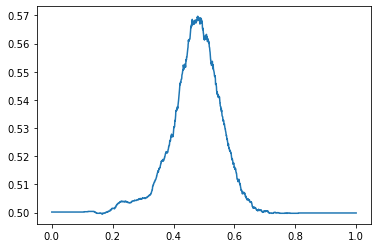

In [312]:
plt.plot(values, acc_arr);

In [294]:
#metrics of the model
log_predict = (log_predict_prob >= threshold)*1
log_acc, log_tpr, log_fpr = compute_metrics(test100, log_predict, "logistic regression")

The accuracy of the logistic regression model is 0.5381882770870338
The true positive rate of the logistic regression model is 0.651595744680851
The false positive rate of the logistic regression model is 0.5756227758007118


We then tried building another logistic regression model, this time predicting whether a song would reach the top 50 chart instead.

In [331]:
logreg50 = LogisticRegression(penalty = 'l1', solver = 'saga', random_state = 2, fit_intercept = False)

train50 = (train_reclass.astype(int) <= 50) * 1
test50 = (test_reclass.astype(int) <= 50) * 1

logreg50.fit(train_columns.apply(center_data), train50)
log50_predict_prob = logreg50.predict_proba(test_columns)[:,1]

In [315]:
#determine which coefficients were removed by the regularization
np.where(logreg50.coef_[0] == 0)

(array([18, 23], dtype=int64),)

In [316]:
print(train_columns.columns[18])
print(train_columns.columns[23])

Month_Feb
Month_May


The chosen threshold value is 1.0


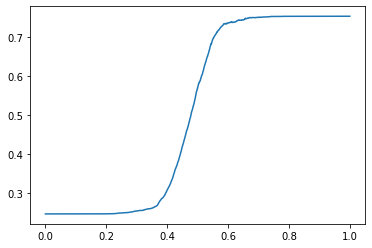

In [344]:
#pick a threshold value
values50 = np.linspace(0,1,2001)
threshold50 = 0
accuracy50 = 0
acc50_arr = []
log50_predict_prob_train = logreg50.predict_proba(train_columns)[:,1]

for value in values50:
    predict50 = (log50_predict_prob_train >= value)*1
    temp_acc = acc_calc(train50, predict50)
    acc50_arr.append(temp_acc)
    if temp_acc > accuracy:
        accuracy50 = temp_acc
        threshold50 = value
        
print(f"The chosen threshold value is {threshold50}")
plt.plot(values,acc50_arr);

In [345]:
#metrics of the model
log50_predict = (log50_predict_prob >= threshold50)*1
log50_acc, log50_tpr, log50_fpr = compute_metrics(test50, log50_predict, "logistic regression")

The accuracy of the logistic regression model is 0.7477797513321492
The true positive rate of the logistic regression model is 0.0
The false positive rate of the logistic regression model is 0.0


Note that this means that for predicting the top 50, no threshold value outperforms the baseline model.

## LDA

In [183]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ldaMulti = LinearDiscriminantAnalysis()

ldaMulti.fit(train_columns, train_reclass)
lda_predict_multi = ldaMulti.predict(test_columns)

lda_acc_multi = acc_calc(test_reclass, lda_predict_multi)
print(f"The accuracy of the LDA multi-class model is {lda_acc_multi}")

The accuracy of the LDA multi-class model is 0.49733570159857904


We will next create an LDA model to predict whether a song will solely end up in the Top 50 chart.

In [186]:
lda50 = LinearDiscriminantAnalysis()

lda50.fit(train_columns, train50)
y_predLDA50 = lda50.predict(test_columns)

lda50_acc, lda50_tpr, lda50_fpr = compute_metrics(test50, y_predLDA50, "LDA")

The accuracy of the LDA model is 0.7477797513321492
The true positive rate of the LDA model is 0.03697183098591549
The false positive rate of the LDA model is 0.012470308788598575


We will then create an LDA model to predict whether a song will end up in the Top 100 chart.

In [188]:
lda = LinearDiscriminantAnalysis()

lda.fit(train_columns, train100)
lda_predict = lda.predict(test_columns)

lda_acc, lda_tpr, lda_fpr = compute_metrics(test100, lda_predict, "LDA")

The accuracy of the LDA model is 0.5435168738898757
The true positive rate of the LDA model is 0.5452127659574468
The false positive rate of the LDA model is 0.4581850533807829


Of the three LDA models we've created, the LDA model for predicting whether a sonng will end up in the Top 50 chart has the highest test set accuracy.

## CART Model

In [190]:
#cross validation to choose complexity parameter
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()

param_values = {'ccp_alpha': np.linspace(0, 0.10, 201),
               'min_samples_leaf': [5],
               'random_state': [2]}

dtc_cv = GridSearchCV(dtc, param_grid = param_values)
dtc_cv.fit(train_columns, train100)

acc = dtc_cv.cv_results_['mean_test_score'] # what sklearn calls mean_test_score is the holdout set, i.e. the validation set.
ccp = dtc_cv.cv_results_['param_ccp_alpha'].data

pd.DataFrame({'ccp alpha' : ccp, 'Accuracy': acc}).sort_values("Accuracy", ascending=False)

,ccp alpha,Accuracy
6,0.003,0.562921
4,0.002,0.562366
5,0.0025,0.561811
2,0.001,0.561480
3,0.0015,0.560480
...,...,...
87,0.0435,0.500167
88,0.044,0.500167
89,0.0445,0.500167
90,0.045,0.500167


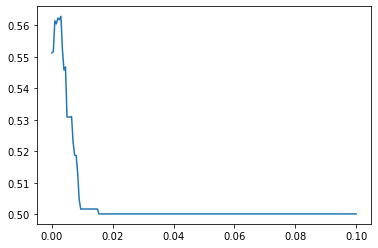

In [192]:
plt.plot(ccp, acc);

In [194]:
#now run the model using the chosen complexity parameter
#dtc = DecisionTreeClassifier(ccp_alpha = 0.003)
dtc = dtc_cv.best_estimator_
dtc.fit(train_columns, train100);
cart_predict = dtc.predict(test_columns)
dtc_acc, dtc_tpr, dtc_fpr = compute_metrics(test100, cart_predict, "CART")

The accuracy of the CART model is 0.61101243339254
The true positive rate of the CART model is 0.5469858156028369
The false positive rate of the CART model is 0.32473309608540923


## Bagging

In [196]:
from sklearn.ensemble import RandomForestClassifier

bag = RandomForestClassifier(max_features=len(train_columns.columns)).fit(train_columns, train100)
bag_predict = bag.predict(test_columns)
bag_acc, bag_tpr, bag_fpr = compute_metrics(test100, bag_predict, "Bagging")

The accuracy of the Bagging model is 0.5914742451154529
The true positive rate of the Bagging model is 0.5469858156028369
The false positive rate of the Bagging model is 0.3638790035587189


## Random Forest

In [222]:
rf = RandomForestClassifier()

param_values = {'max_features': np.arange(1,len(train_columns.columns)+1,1),
               'random_state': [23]}

rf_cv = GridSearchCV(rf, param_grid = param_values)
rf_cv.fit(train_columns, train100)

acc_rf = rf_cv.cv_results_['mean_test_score'] # what sklearn calls mean_test_score is the holdout set, i.e. the validation set.
mf_rf = rf_cv.cv_results_['param_max_features'].data

pd.DataFrame({'Max Features' : mf_rf, 'Validation Accuracy': acc_rf}).head(10).sort_values("Validation Accuracy", ascending=False)

,Max Features,Validation Accuracy
8,9,0.559593
9,10,0.557259
7,8,0.554706
4,5,0.551039
5,6,0.548263
6,7,0.547597
3,4,0.541264
2,3,0.529489
1,2,0.521603
0,1,0.516495


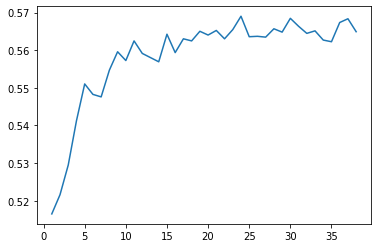

In [223]:
plt.plot(mf_rf, acc_rf);

In [224]:
rf = rf_cv.best_estimator_
#rf = RandomForestClassifier(max_features = 9)
rf.fit(train_columns, train100);
rf_predict = rf.predict(test_columns)

In [225]:
rf_acc, rf_tpr, rf_fpr = compute_metrics(test100, rf_predict, "Random Forest")

The accuracy of the Random Forest model is 0.5928063943161634
The true positive rate of the Random Forest model is 0.5540780141843972
The false positive rate of the Random Forest model is 0.3683274021352313


In [381]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate = 0.01).fit(train_columns, train100)
gbc_predict = gbc.predict(test_columns)
gbc_acc, gbc_tpr, gbc_fpr = compute_metrics(test100, gbc_predict, "Gradient Boosting")

The accuracy of the Gradient Boosting model is 0.6198934280639432
The true positive rate of the Gradient Boosting model is 0.7446808510638298
The false positive rate of the Gradient Boosting model is 0.505338078291815


# Model Performance

In [367]:
def bootstrap(model_list, test_data, true_y, metrics, sample = 500):
    """Computes the bootstrap of a list of metrics for a list of models
    model_list: list of models to use
    test_data: dataframe of testing columns - must not include response variable!
    true_y: Series of true response variable values
    metrics: list of metrics to be computed. Metrics must be functions that each take an input of (y_actual, y_predicted)
    sample: number of bootstrap samples to be computed
    """
    output_array = np.zeros((len(metrics),len(model_list), sample))
    for i in range(sample):
        
        #create the bootstrapped data:
        index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        data = test_data.loc[index]
        y = true_y.loc[index]
        
        #fit the data to each model:
        for j in range(len(model_list)):
            if (model_list[j] == logreg):
                prob = model_list[j].predict_proba(data)[:,1]
                predictions = (prob >= threshold) * 1
            else:
                predictions = model_list[j].predict(data)
            
            for k in range(len(metrics)):
                output_array[k,j,i] = metrics[k](y, predictions)
        
    return output_array

In [364]:
def ci(data, param_est, cl = 0.95):
    lower = param_est - np.quantile(data, 1-(1-cl)/2)
    upper = param_est - np.quantile(data, (1-cl)/2)
    return [lower, upper]

In [382]:
param_est = [log_acc, lda_acc, dtc_acc, bag_acc, rf_acc, gbc_acc]

model_names = ["Logistic Regression", "LDA", "CART", "Bagging", "Random Forest", "Gradient Boosting"]

In [383]:
model_list = [logreg, lda, dtc, bag, rf, gbc]
acc_values = bootstrap(model_list, test_columns, test100, [acc_calc])

In [384]:
model1_list = []
model2_list = []
lower = []
upper = []
model_list = [logreg, lda, dtc, bag, rf, gbc]
param_est = [log_acc, lda_acc, dtc_acc, bag_acc, rf_acc, gbc_acc]
acc_values_copy = acc_values.copy()[0] #index into values properly

#now compare each set of models
while len(model_list) > 0:
    #pulls the information about the first model and then deletes it from list to avoid comparing model to itself
    model1 = model_list.pop(0)
    param1 = param_est.pop(0)
    data1 = acc_values_copy[0]
    acc_values_copy = np.delete(acc_values_copy,0,axis=0)
    
    for i in range(len(model_list)):
        
        if model1 != model_list[i]:
            model1_list.append(model1)
            model2_list.append(model_list[i])
            
            #now calculate the confidence interval
            temp = data1 - acc_values_copy[i]
            temp_ci = ci(np.array(temp) - (param1 - param_est[i]), param1 - param_est[i])
            
            lower.append(temp_ci[0])
            upper.append(temp_ci[1])

In [388]:
model1_list

['Logistic Regression',
 'Logistic Regression',
 'Logistic Regression',
 'Logistic Regression',
 'Logistic Regression',
 'LDA',
 'LDA',
 'LDA',
 'LDA',
 'CART',
 'CART',
 'CART',
 'Bagging',
 'Bagging',
 'Random Forest']

In [385]:
#convert the model lists into the model names:

for i in range(len(model1_list)):
    if model1_list[i] == logreg:
        model1_list[i] = "Logistic Regression"
    elif model1_list[i] == lda:
        model1_list[i] = "LDA"
    elif model1_list[i] == dtc:
        model1_list[i] = "CART"
    elif model1_list[i] == bag:
        model1_list[i] = "Bagging"
    elif model1_list[i] == rf:
        model1_list[i] = "Random Forest"
    elif model1_list[i] == gbc:
        model1_list[i] = "Gradient Boosting"
        
for i in range(len(model2_list)):
    if model2_list[i] == logreg:
        model2_list[i] = "Logistic Regression"
    elif model2_list[i] == lda:
        model2_list[i] = "LDA"
    elif model2_list[i] == dtc:
        model2_list[i] = "CART"
    elif model2_list[i] == bag:
        model2_list[i] = "Bagging"
    elif model2_list[i] == rf:
        model2_list[i] = "Random Forest"
    elif model1_list[i] == gbc:
        model1_list[i] = "Gradient Boosting"

In [386]:
pd.DataFrame(data = {'Model 1': model1_list,
                     'Model 2': model2_list,
                     "Lower CI": lower,
                     "Upper CI": upper})

,Model 1,Model 2,Lower CI,Upper CI
0,Logistic Regression,LDA,-0.018206,0.010213
1,Logistic Regression,CART,-0.097247,-0.045293
2,Logistic Regression,Bagging,-0.077054,-0.030639
3,Logistic Regression,Random Forest,-0.076377,-0.029751
4,Logistic Regression,([DecisionTreeRegressor(criterion='friedman_ms...,-0.102809,-0.059270
5,LDA,CART,-0.091707,-0.043051
6,LDA,Bagging,-0.072380,-0.024423
7,LDA,Random Forest,-0.071303,-0.024167
8,LDA,([DecisionTreeRegressor(criterion='friedman_ms...,-0.099700,-0.054829
9,CART,Bagging,0.000888,0.036412
